In [40]:
# Using xr, open cyg.ddmi.s20180801-030000-e20180801-210000.l3.grid-soil-moisture-36km.a32.d33.nc and print the metadata

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from mapper_functions import plot_global_tight_pcm

from my_functions import read_obsfcstana_extend_datetime

ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/data/Y2020/M06/cyg.ddmi.s20200601-030000-e20200601-210000.l3.grid-soil-moisture-36km.a32.d33.nc')

print(ds)

<xarray.Dataset> Size: 10MB
Dimensions:         (time: 1, lat: 252, lon: 802, timeslices: 4, startstop: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2020-06-01T12:00:00
    latitude        (lat, lon) float32 808kB ...
    longitude       (lat, lon) float32 808kB ...
Dimensions without coordinates: lat, lon, timeslices, startstop
Data variables:
    SM_daily        (time, lat, lon) float32 808kB ...
    SM_subdaily     (timeslices, lat, lon) float32 3MB ...
    SIGMA_daily     (time, lat, lon) float32 808kB ...
    SIGMA_subdaily  (timeslices, lat, lon) float32 3MB ...
    timeintervals   (timeslices, startstop) datetime64[ns] 64B ...
Attributes: (12/39)
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    comment:                   This Level 3 gridded product combines all 8 x ...
    program:                   CYGNSS
    project:                   CYGNSS
    references:                Ruf, C., D. McKague, D. Posselt, S. Gleason, M...
   

In [41]:
# Import time, latitudes and longitudes
time = ds['time']
timeintervals = ds['timeintervals']
latitude = ds['latitude']
longitude = ds['longitude']

# Import soil moisture
sm_daily = ds['SM_daily']
sm_subdaily = ds['SM_subdaily']
sigma_daily = ds['SIGMA_daily']
sigma_subdaily = ds['SIGMA_subdaily']

In [42]:
# Dimensions of sm_subdaily
print(sm_subdaily.shape)

print(timeintervals.values)

timeintervals = timeintervals.values

print(timeintervals[0])
print(timeintervals[1])
print(timeintervals[2])
print(timeintervals[3])

# Parse the subdaily data

sm_03z = sm_subdaily[0,:,:]
sm_09z = sm_subdaily[2,:,:]
sm_15z = sm_subdaily[1,:,:]
sm_21z = sm_subdaily[3,:,:]

(4, 252, 802)
[['2020-06-01T00:00:00.000000000' '2020-06-01T06:00:00.000000000']
 ['2020-06-01T12:00:00.000000000' '2020-06-01T18:00:00.000000000']
 ['2020-06-01T06:00:00.000000000' '2020-06-01T12:00:00.000000000']
 ['2020-06-01T18:00:00.000000000' '2020-06-02T00:00:00.000000000']]
['2020-06-01T00:00:00.000000000' '2020-06-01T06:00:00.000000000']
['2020-06-01T12:00:00.000000000' '2020-06-01T18:00:00.000000000']
['2020-06-01T06:00:00.000000000' '2020-06-01T12:00:00.000000000']
['2020-06-01T18:00:00.000000000' '2020-06-02T00:00:00.000000000']


 Saving figure as SM_subdaily_Min_0_00284_Max_0_606_2020_06_01T03_00_00z.png 



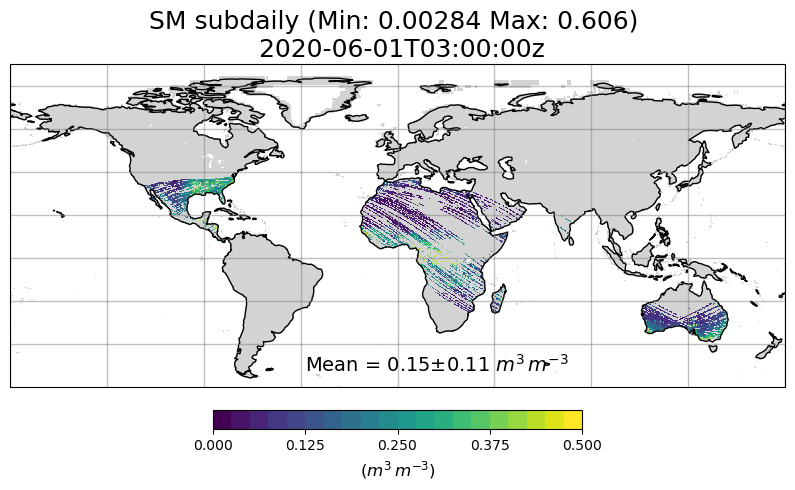

In [43]:
# Rearrange 2D data into 1D

lats = latitude.values.flatten()
lons = longitude.values.flatten()
sm_to_plot = sm_03z.values.flatten()


n_gridcell = len(lats)

# Plot the data
obarray = np.empty([n_gridcell, 3])
obarray.fill(np.nan)
obarray[:, 1] = lons
obarray[:, 2] = lats

obarray[:, 0] = sm_to_plot
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,True, True,f'SM subdaily (Min: {minval:.3g} Max: {maxval:.3g}) \n 2020-06-01T03:00:00z','$m^3 \, m^{-3}$', 0, 0.5)



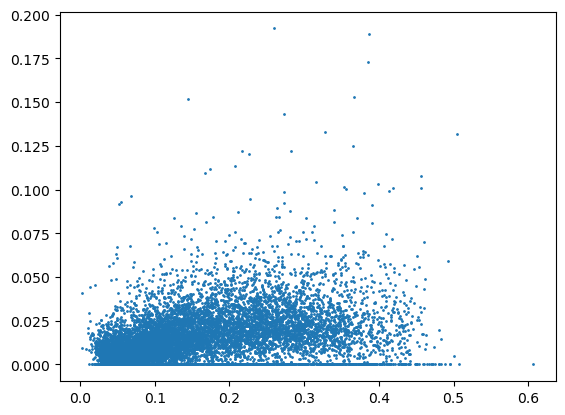

In [44]:
sg_03z = sigma_subdaily[0,:,:]
sg_09z = sigma_subdaily[2,:,:]
sg_15z = sigma_subdaily[1,:,:]
sg_21z = sigma_subdaily[3,:,:]

plt.scatter(sm_03z, sg_03z, s=1)

# plt.hexbin(sm_03z, sg_03z, gridsize=40, cmap='viridis', norm=LogNorm(vmin=1))


<xarray.Dataset> Size: 3MB
Dimensions:              (lat: 252, lon: 802)
Dimensions without coordinates: lat, lon
Data variables:
    latitude             (lat, lon) float32 808kB ...
    longitude            (lat, lon) float32 808kB ...
    flag_small_SM_range  (lat, lon) uint8 202kB ...
    flag_poor_SMAP       (lat, lon) uint8 202kB ...
    flag_high_ubrmsd     (lat, lon) uint8 202kB ...
    flag_few_obs         (lat, lon) uint8 202kB ...
    flag_low_signal      (lat, lon) uint8 202kB ...
Attributes: (12/37)
    source:                 ucar_cu_cygnss_sm_v1_static_flags.nc
    id:                     PODAAC-CYGNU-L3SM1
    ShortName:              CYGNSS_L3_SOIL_MOISTURE_V1.0
    title:                  UCAR/CU CYGNSS Level 3 Soil Moisture Product
    summary:                CYGNSS soil moisture static quality flag file
    comment:                Dataset created by UCAR and CU Boulder
    ...                     ...
    geospatial_lon_min:     -135.0
    geospatial_lon_max:     164.

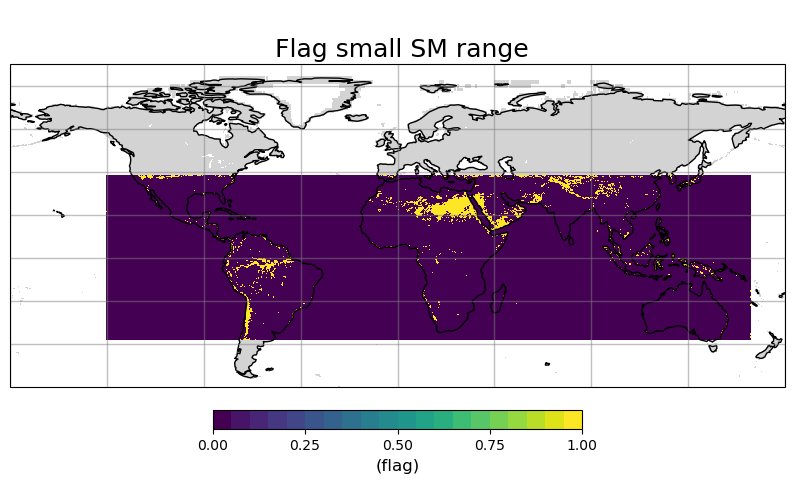

 Saving figure as _Flag_poor_SMAP.png 



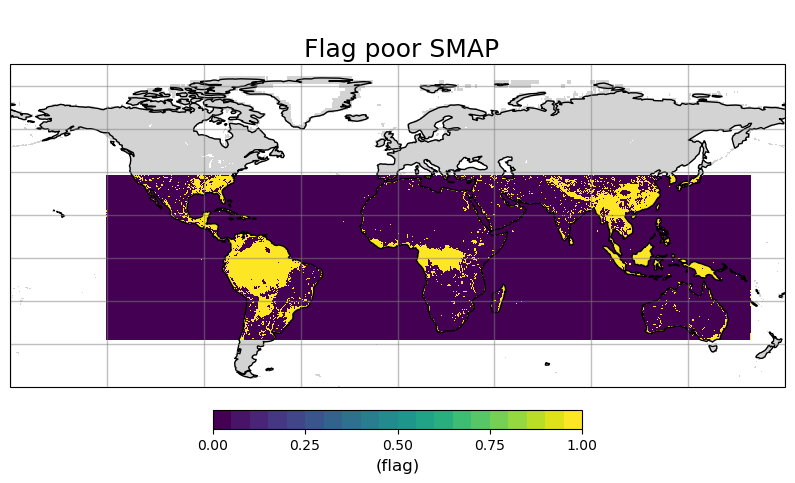

 Saving figure as _Flag_high_ubrmsd.png 



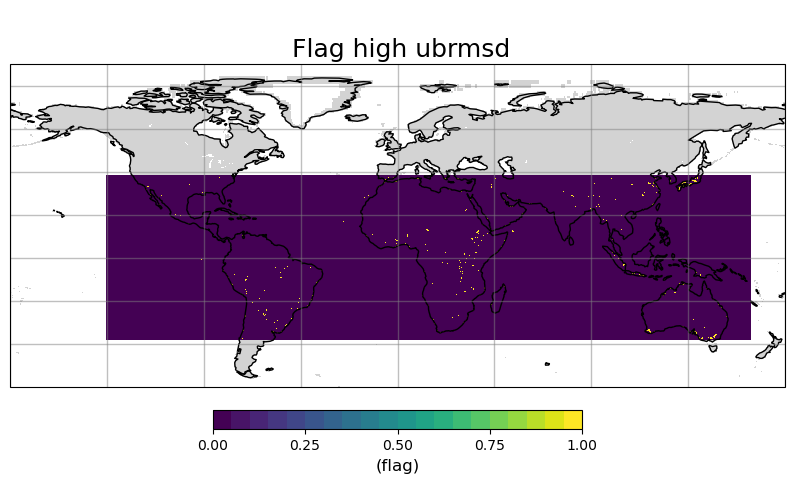

 Saving figure as _Flag_few_obs.png 



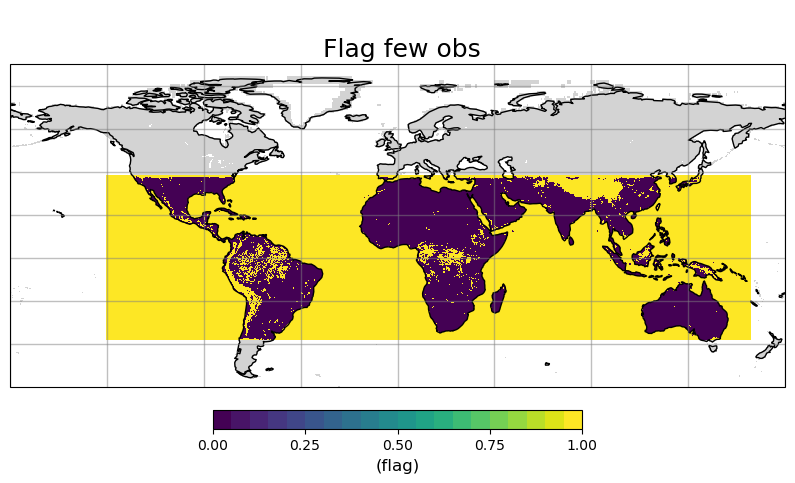

 Saving figure as _Flag_low_signal.png 



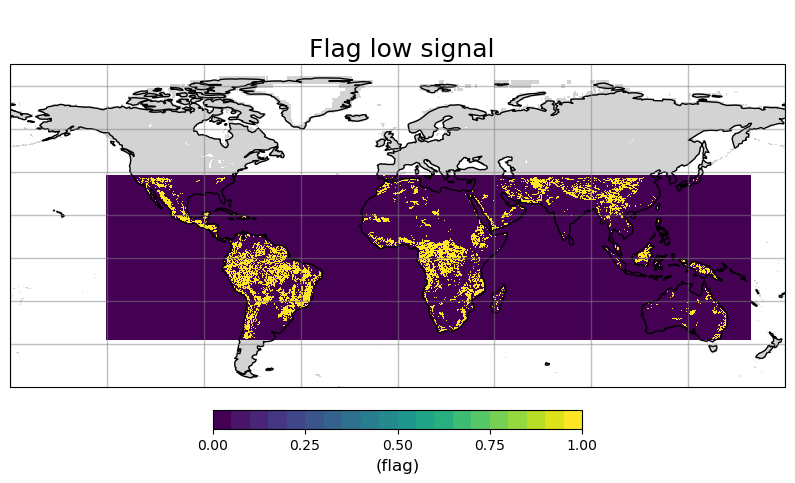

In [45]:
# Open '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/ucar_cu_cygnss_sm_v1_static_flags.nc and map each QC flag in it

ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/ucar_cu_cygnss_sm_v1_static_flags.nc')

print(ds)

# Import the QC flags flag_small_SM_range, flag_poor_SMAP, flag_high_ubrmsd, flag_few_obs, flag_low_signal

flag_small_SM_range = ds['flag_small_SM_range']
flag_poor_SMAP = ds['flag_poor_SMAP']
flag_high_ubrmsd = ds['flag_high_ubrmsd']
flag_few_obs = ds['flag_few_obs']
flag_low_signal = ds['flag_low_signal']

# Rearrange 2D data into 1D

flag_small_SM_range = flag_small_SM_range.values.flatten()
flag_poor_SMAP = flag_poor_SMAP.values.flatten()
flag_high_ubrmsd = flag_high_ubrmsd.values.flatten()
flag_few_obs = flag_few_obs.values.flatten()
flag_low_signal = flag_low_signal.values.flatten()

# Replace the fill values (255) with 0
flag_small_SM_range[flag_small_SM_range == 255] = 0
flag_poor_SMAP[flag_poor_SMAP == 255] = 0
flag_high_ubrmsd[flag_high_ubrmsd == 255] = 0
flag_few_obs[flag_few_obs == 255] = 0
flag_low_signal[flag_low_signal == 255] = 0

# Plot the data
obarray = np.empty([n_gridcell, 3])
obarray.fill(np.nan)
obarray[:, 1] = lons
obarray[:, 2] = lats

obarray[:, 0] = flag_small_SM_range
plot_global_tight_pcm(obarray, True, False, '\n Flag small SM range', 'flag', 0, 1)

obarray[:, 0] = flag_poor_SMAP
plot_global_tight_pcm(obarray, True, False, '\n Flag poor SMAP', 'flag', 0, 1)

obarray[:, 0] = flag_high_ubrmsd
plot_global_tight_pcm(obarray, True, False, '\n Flag high ubrmsd', 'flag', 0, 1)

obarray[:, 0] = flag_few_obs
plot_global_tight_pcm(obarray, True, False, '\n Flag few obs', 'flag', 0, 1)

obarray[:, 0] = flag_low_signal
plot_global_tight_pcm(obarray, True, False, '\n Flag low signal', 'flag', 0, 1)

 Saving figure as _Combined_flag.png 



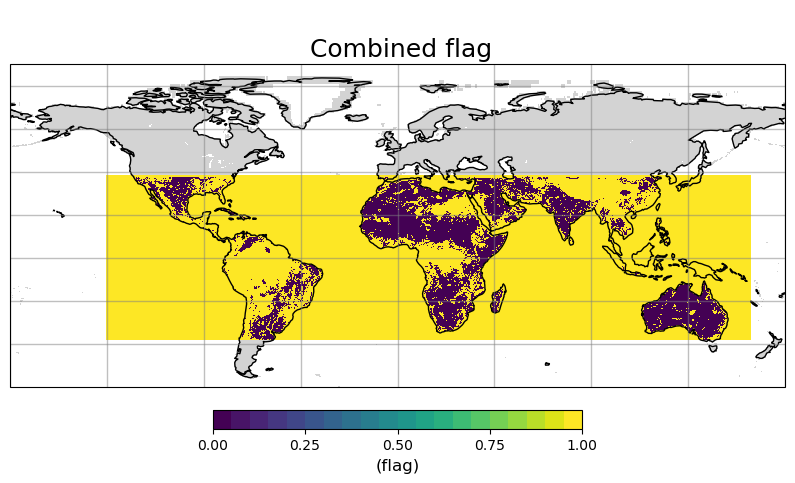

In [46]:
# Assuming flag arrays are flattened and of the same length
combined_flag = np.full(flag_small_SM_range.shape, 0)

for i in range(flag_small_SM_range.shape[0]):
    if (flag_small_SM_range[i] == 1 or 
        flag_poor_SMAP[i] == 1 or 
        flag_high_ubrmsd[i] == 1 or 
        flag_few_obs[i] == 1 or 
        flag_low_signal[i] == 1):
        combined_flag[i] = 1

# Plot the combined flag
obarray[:, 0] = combined_flag
plot_global_tight_pcm(obarray, True, False, '\n Combined flag', 'flag', 0, 1)

Number of data QC-d out: 3574
The fraction of data QC'd out: 0.3110260203637629
 Saving figure as Masked_SM_subdaily_Min_0_00284_Max_0_507_2020_06_01T03_00_00z.png 



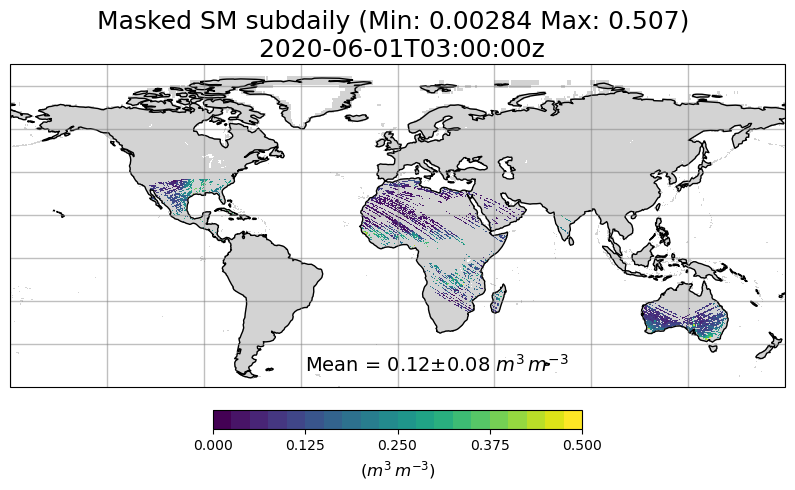

In [47]:
# Apply the combined flag to sm_daily, 1 = bad data, 255 = good data, calculate how many additional values are QC'd out, and then plot the data

sm_daily_combined = sm_03z.values.flatten()
sm_daily_combined[combined_flag == 1] = np.nan

print("Number of data QC-d out:", np.sum(np.isnan(sm_daily_combined)) - np.sum(np.isnan(sm_03z.values.flatten())))
print("The fraction of data QC'd out:", (np.sum(np.isnan(sm_daily_combined)) - np.sum(np.isnan(sm_03z.values.flatten()))) / np.sum(~np.isnan(sm_03z.values.flatten())))

obarray[:, 0] = sm_daily_combined
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray, True, True, f'Masked SM subdaily (Min: {minval:.3g} Max: {maxval:.3g}) \n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

In [48]:
# For each file found that matches in /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/data/Y2020/M06/cyg.ddmi.s*
# open and extract sm_subdaily, then for each time slice apply the combined flag, calculate how many additional values are QC'd out

# Get the list of netcdf files using os

import os
import glob

def find_files(directory, pattern):
    # Use glob to search for files matching the pattern in the directory and subdirectories
    return glob.glob(os.path.join(directory, '**', pattern), recursive=True)

directory = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/data/CYGNSS_obs'
pattern = 'cyg.ddmi.s*'

files = find_files(directory, pattern)

total = 0
cnt = 0

for file in files:
    # print(file)
    if file.endswith('grid-soil-moisture-36km.a32.d33.nc'):
        ds = xr.open_dataset(file)
        sm_subdaily = ds['SM_subdaily']
        sm_subdaily = sm_subdaily.values
        timeintervals = ds['timeintervals'].values
        for i in range(4):
            sm_subdaily_combined = sm_subdaily[i,:,:].flatten()
            sm_subdaily_combined[combined_flag == 1] = np.nan
            # print(f" Number not nan", np.sum(~np.isnan(sm_subdaily[i,:,:].flatten())))
            # print(f"Number of data QC-d out for {file} at {timeintervals[i]}:", np.sum(np.isnan(sm_subdaily_combined)) - np.sum(np.isnan(sm_subdaily[i,:,:].flatten())))
            # print(f"The fraction of data QC'd out for {file} at {timeintervals[i]}:", ((np.sum(np.isnan(sm_subdaily_combined)) - np.sum(np.isnan(sm_subdaily[i,:,:].flatten()))) / np.sum(~np.isnan(sm_subdaily[i,:,:].flatten()))))

            total += ((np.sum(np.isnan(sm_subdaily_combined)) - np.sum(np.isnan(sm_subdaily[i,:,:].flatten()))) / np.sum(~np.isnan(sm_subdaily[i,:,:].flatten())))
            cnt += 1

print(f"Number of obs periods read = ", cnt)
print(f"Mean of data QC'd out = ", total / cnt)

            





Number of obs periods read =  124
Mean of data QC'd out =  0.37509904750240675


 Saving figure as SFMC_FCST_Min_0_0111_Max_0_89_2020_06_01T03_00_00z.png 



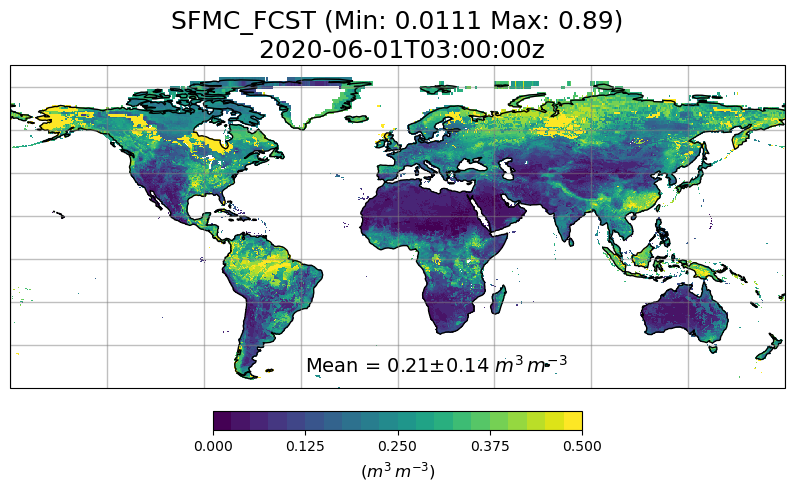

 Saving figure as Surface_Moisture_Content_Forecast_2020_06_01T03_00_00z.png 



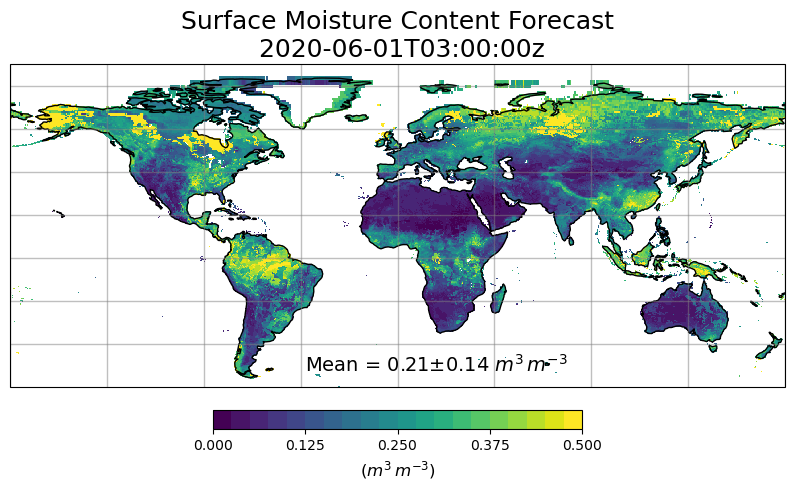

 Saving figure as RZMC_FCST_Min_0_00734_Max_0_93_2020_06_01T03_00_00z.png 



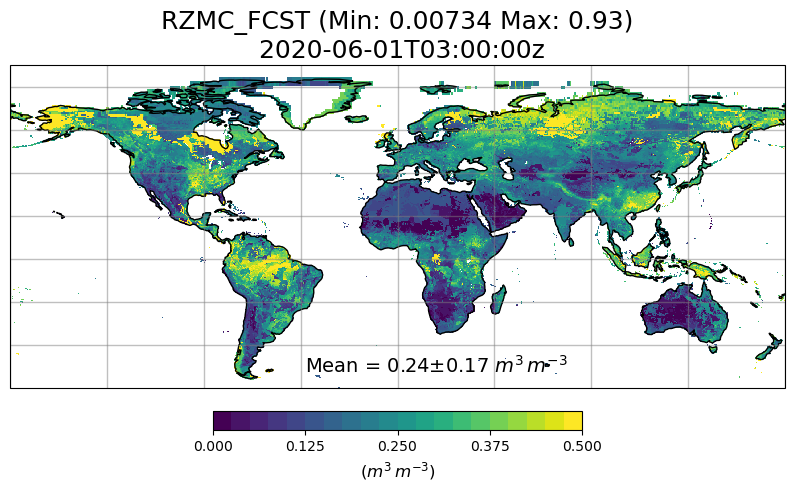

In [53]:
# Open the lndfcstana .nc file and map the data

ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/multi_obs_cygd_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2020/M06/multi_obs_cygd_M36.inst3_1d_lndfcstana_Nt.20200601_0300z.nc4')

ds_lon = ds['lon']
ds_lat = ds['lat']
sfmc_fcst = ds['SFMC_FCST']
rzmc_fcst = ds['RZMC_FCST']

obarray = np.empty([len(ds_lat), 3])
obarray.fill(np.nan)
obarray[:, 1] = ds_lon.values
obarray[:, 2] = ds_lat.values

obarray[:, 0] = sfmc_fcst.values

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'SFMC_FCST (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

plot_global_tight_pcm(obarray, True, True, f'Surface Moisture Content Forecast\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

obarray[:, 0] = rzmc_fcst.values

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'RZMC_FCST (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

In [50]:
# Use read_obsfcstana_extend_datetime to read /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803*

path = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/incr_cygd_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2020/M06/'
file_name_start = 'incr_cygd_M36.ens_avg.ldas_ObsFcstAna.20200601_0300z'
printflag = True

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)
date_time = np.array(date_time)
obs_species = np.array(obs_species)
obs_tilenum = np.array(obs_tilenum)
obs_lon = np.array(obs_lon)
obs_lat = np.array(obs_lat)
obs_obs = np.array(obs_obs)
obs_fcst = np.array(obs_fcst)
obs_ana = np.array(obs_ana)

['/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/incr_cygd_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2020/M06/incr_cygd_M36.ens_avg.ldas_ObsFcstAna.20200601_0300z.bin']
Reading file  /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/incr_cygd_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2020/M06/incr_cygd_M36.ens_avg.ldas_ObsFcstAna.20200601_0300z.bin ...


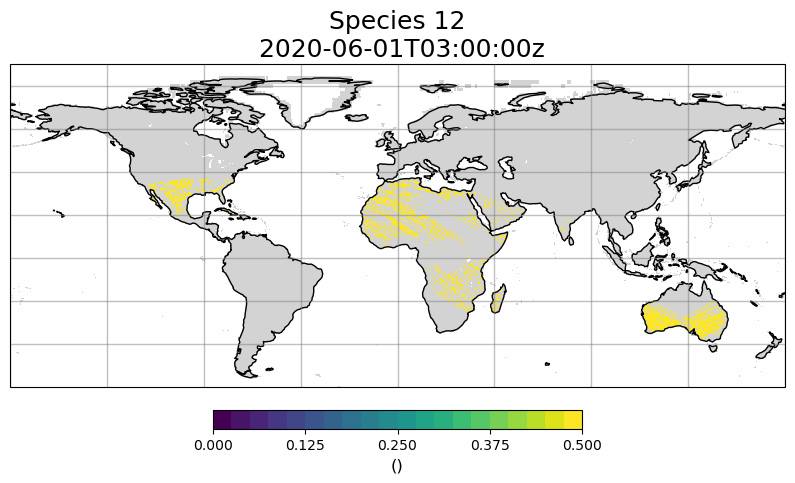

 Saving figure as Species_12_Obs_Min_0_00284_Max_0_495_2020_06_01T03_00_00z.png 



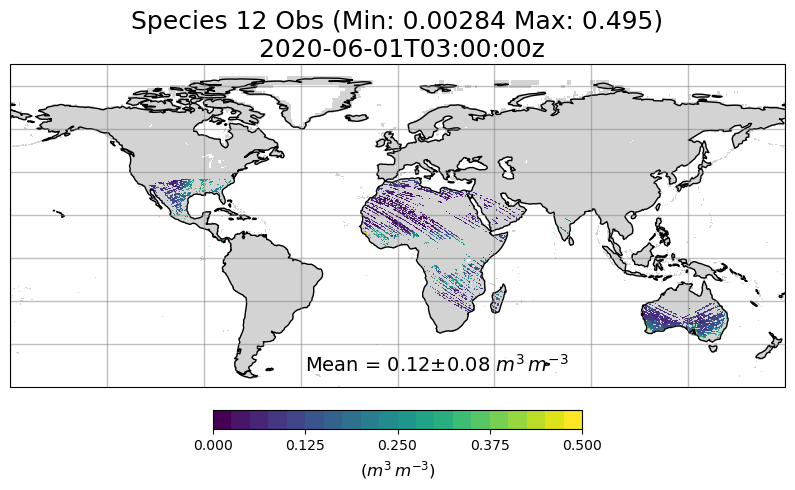

 Saving figure as Species_12_Fcst_Min_0_0196_Max_0_545_2020_06_01T03_00_00z.png 



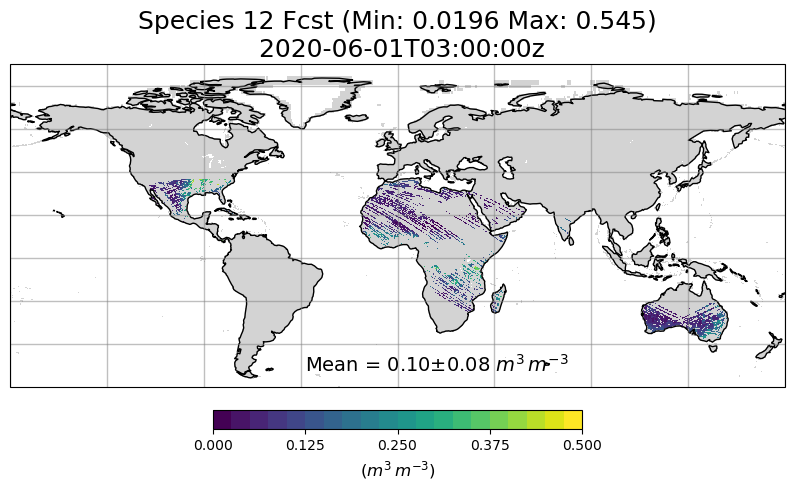

 Saving figure as Species_12_Obs_Fcst_Min_0_286_Max_0_385_2020_06_01T03_00_00z.png 



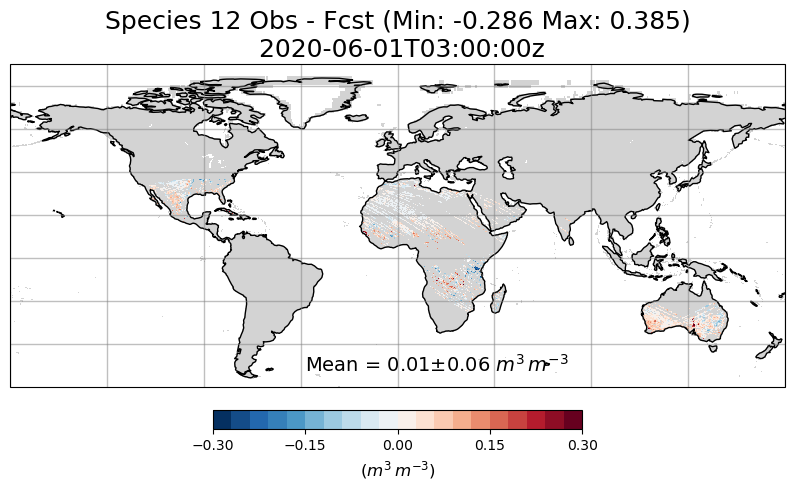

In [51]:
i = 12

n_obs = len(obs_obs[obs_species == i])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[obs_species == i]
obarray[:, 2] = obs_lat[obs_species == i]
obarray[:, 0] = obs_species[obs_species == i]

plot_global_tight_pcm(obarray, False, False, f'Species {i}\n 2020-06-01T03:00:00z', '', 0, 0.5)

obarray[:, 0] = obs_obs[obs_species == i]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Species {i} Obs (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

obarray[:, 0] = obs_fcst[obs_species == i]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Species {i} Fcst (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

obarray[:, 0] = obs_obs[obs_species == i] - obs_fcst[obs_species == i]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Species {i} Obs - Fcst (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', -0.3, 0.3)

 Saving figure as SMOS_Obs_2020_06_01T03_00_00z.png 



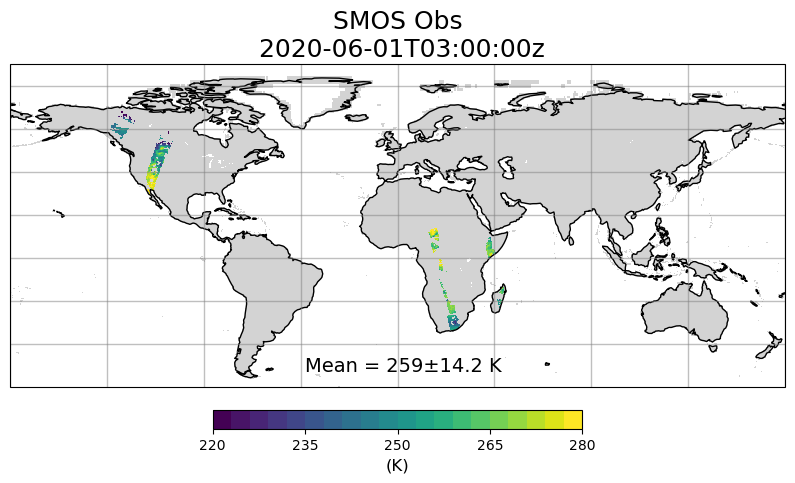

 Saving figure as SMAP_Obs_2020_06_01T03_00_00z.png 



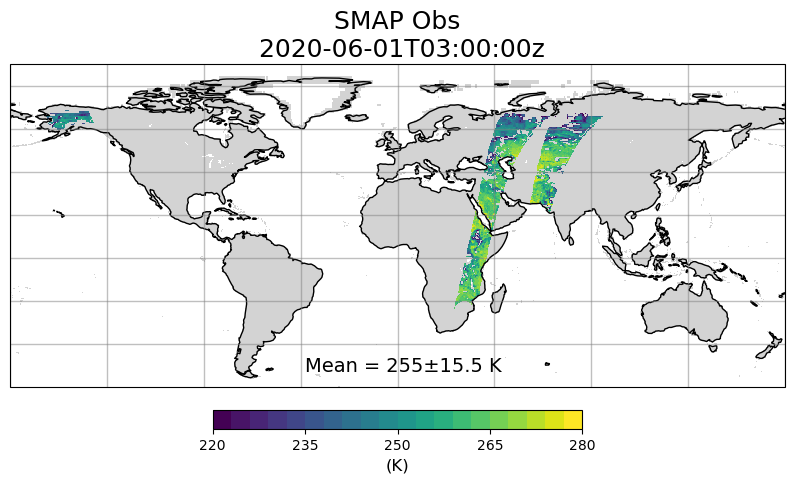

 Saving figure as ASCAT_Obs_2020_06_01T03_00_00z.png 



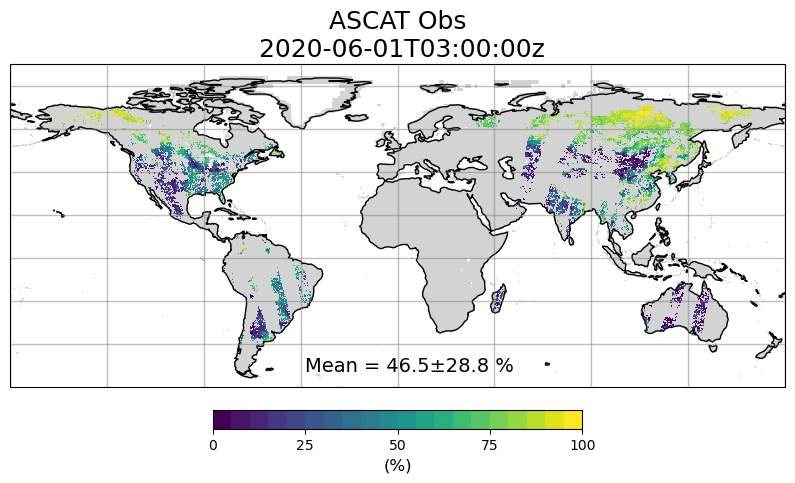

 Saving figure as CYGNSS_Obs_2020_06_01T03_00_00z.png 



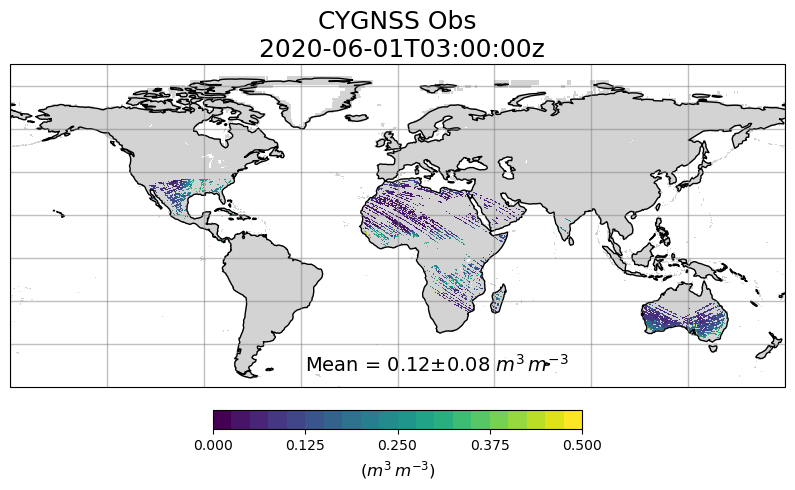

In [28]:
# Find the locations where obs_species is either 1 or 2
mask = np.isin(obs_species, [1, 2])

n_obs = len(obs_obs[mask])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[mask]
obarray[:, 2] = obs_lat[mask]

obarray[:, 0] = obs_obs[mask]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'SMOS Obs\n 2020-06-01T03:00:00z', 'K', 220, 280)

mask = np.isin(obs_species, [5, 6])

n_obs = len(obs_obs[mask])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[mask]
obarray[:, 2] = obs_lat[mask]

obarray[:, 0] = obs_obs[mask]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'SMAP Obs\n 2020-06-01T03:00:00z', 'K', 220, 280)

mask = np.isin(obs_species, [9, 10, 11])

n_obs = len(obs_obs[mask])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[mask]
obarray[:, 2] = obs_lat[mask]

obarray[:, 0] = obs_obs[mask]
obarray[:, 0] = obarray[:, 0] * 100

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'ASCAT Obs\n 2020-06-01T03:00:00z', '%', 0, 100)

mask = np.isin(obs_species, [12])

n_obs = len(obs_obs[mask])
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)

obarray[:, 1] = obs_lon[mask]
obarray[:, 2] = obs_lat[mask]

obarray[:, 0] = obs_obs[mask]

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'CYGNSS Obs\n 2020-06-01T03:00:00z', '$m^3 \, m^{-3}$', 0, 0.5)

 Saving figure as SRFEXC_INCR_Min_6_04_Max_11_5_2020_06_01T03_00_00z.png 



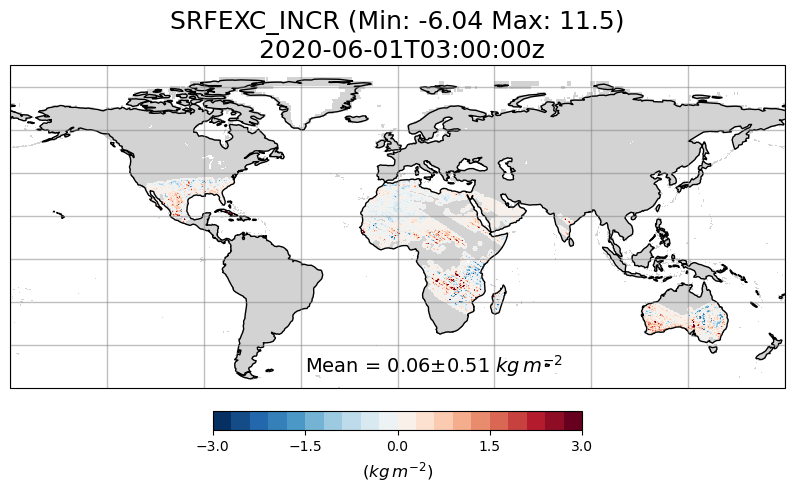

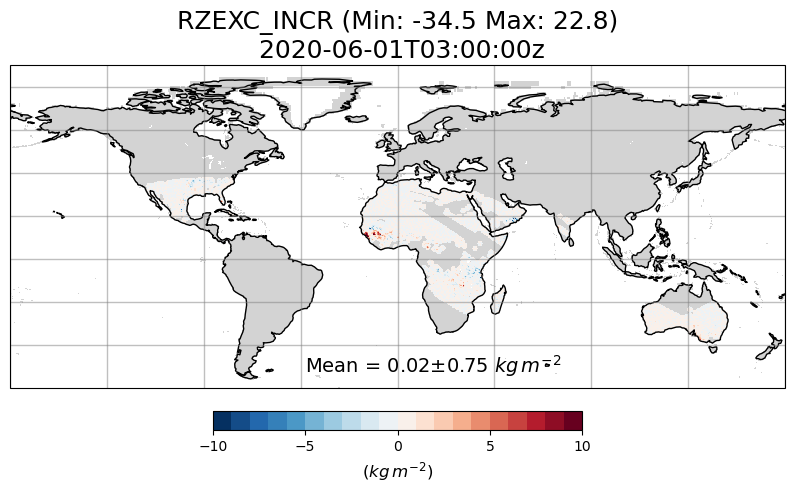

In [31]:
# Load dataset from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/incr_cygd_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2020/M06/incr_cygd_M36.catch_progn_incr.20200601_0300z.nc4

ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/incr_cygd_M36/output/SMAP_EASEv2_M36_GLOBAL/cat/ens_avg/Y2020/M06/incr_cygd_M36.catch_progn_incr.20200601_0300z.nc4')

ds_lon = ds['lon']
ds_lat = ds['lat']

srfexc_incr = ds['SRFEXC_INCR']
rzexc_incr  = ds['RZEXC_INCR']

obarray = np.empty([len(ds_lat), 3])
obarray.fill(np.nan)
obarray[:, 1] = ds_lon.values
obarray[:, 2] = ds_lat.values

obarray[:, 0] = srfexc_incr.values

# Replace 0 with nan
obarray[obarray == 0] = np.nan

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'SRFEXC_INCR (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$kg \, m^{-2}$', -3, 3)

obarray[:, 0] = rzexc_incr.values

# Replace 0 with nan
obarray[obarray == 0] = np.nan

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, False, True, f'RZEXC_INCR (Min: {minval:.3g} Max: {maxval:.3g})\n 2020-06-01T03:00:00z', '$kg \, m^{-2}$', -10, 10)

In [32]:
# Load data from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/long_run_cygd_M36/long_run_cygd_M36_20180801_20190801_obsfcstana_stats.npz

data = np.load('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/long_run_cygd_M36/long_run_cygd_M36_20180801_20190801_obsfcstana_stats.npz')

unique_tilenum = data['unique_tilenum']
num_obs = data['num_obs']
mean_obs_obs = data['mean_obs_obs']
mean_obs_fcst = data['mean_obs_fcst']
mean_obs_ana = data['mean_obs_ana']
mean_obs_minus_fcst = data['mean_obs_minus_fcst']
mean_obs_minus_ana = data['mean_obs_minus_ana']
std_obs_minus_fcst = data['std_obs_minus_fcst']
std_obs_minus_ana = data['std_obs_minus_ana']
lon_tilenum = data['lon_tilenum']
lat_tilenum = data['lat_tilenum']


 Saving figure as Number_of_CYGNSS_obs_Min_1_Max_527_2018_08_01_to_2019_08_01.png 



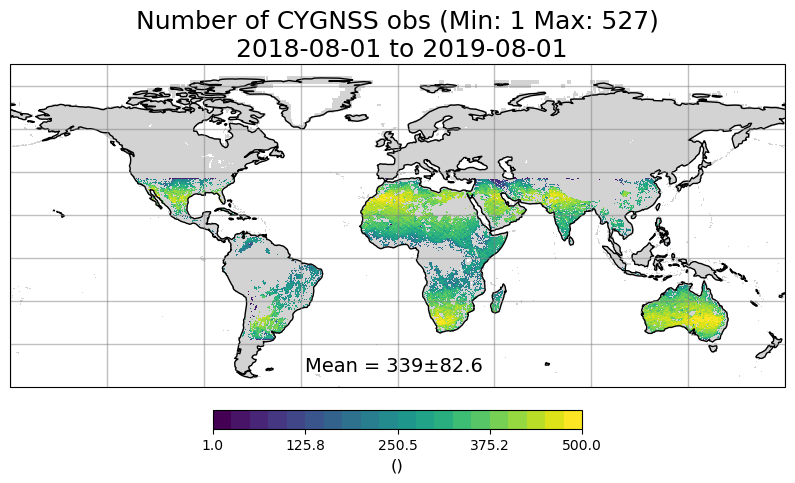

 Saving figure as Mean_of_CYGNSS_obs_Min_0_028_Max_0_461_2018_08_01_to_2019_08_01.png 



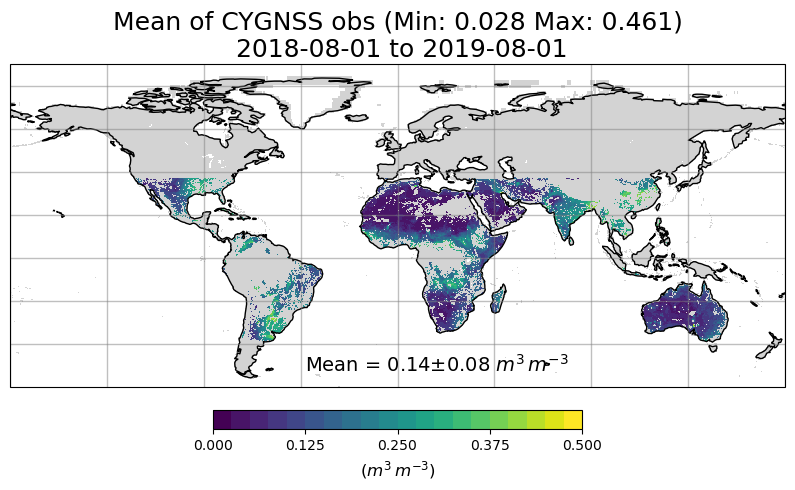

 Saving figure as Mean_of_GEOS_LDAS_fcst_Min_0_0256_Max_0_536_2018_08_01_to_2019_08_01.png 



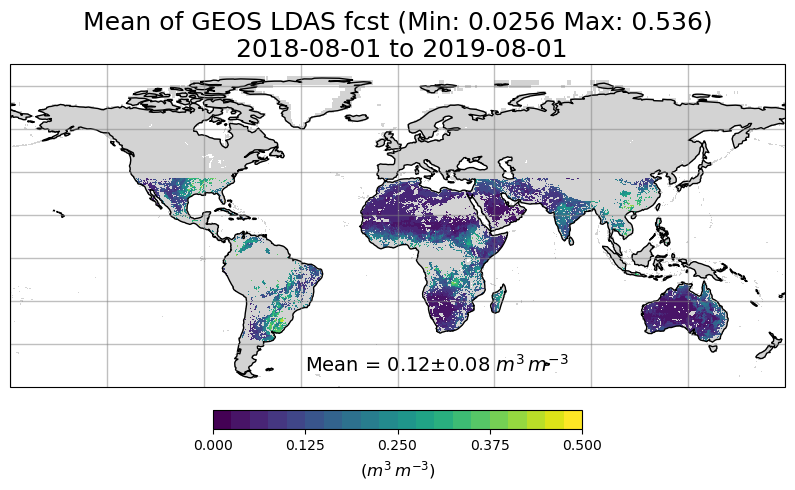

 Saving figure as Mean_of_Obs_minus_Fcst_Min_0_249_Max_0_408_2018_08_01_to_2019_08_01.png 



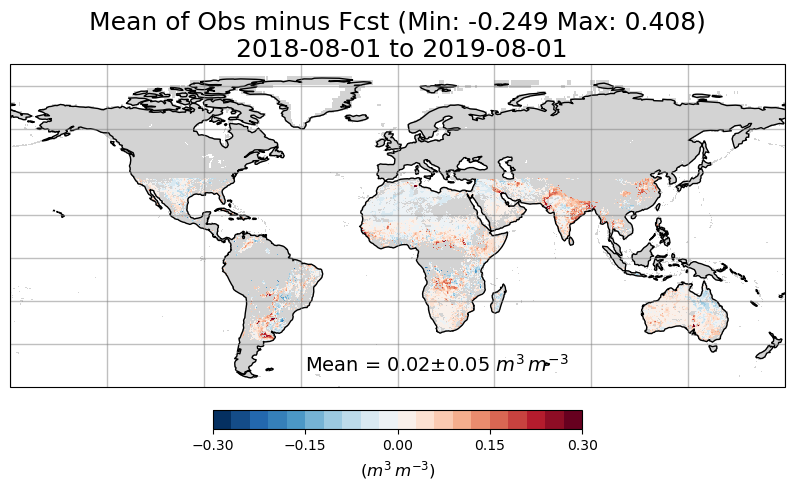

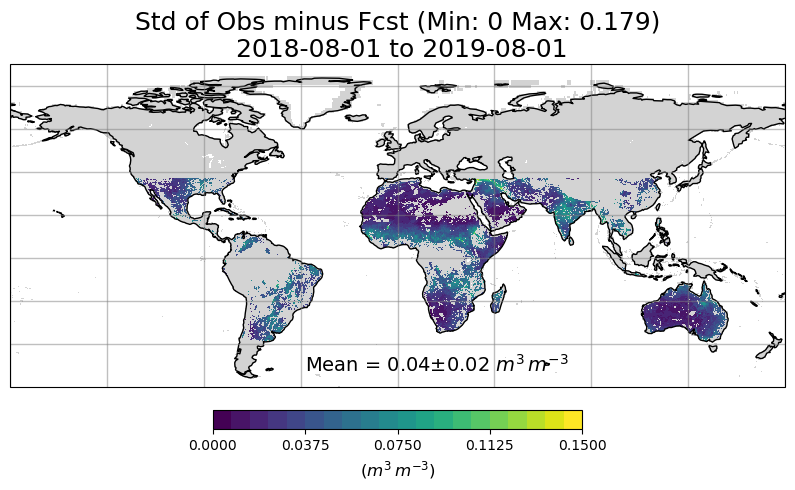

In [34]:

# Plot the number of observations
obarray = np.empty([unique_tilenum.shape[0], 3])
obarray.fill(np.nan)

obarray[:, 1] = lon_tilenum
obarray[:, 2] = lat_tilenum
obarray[:, 0] = num_obs

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Number of CYGNSS obs (Min: {minval:.3g} Max: {maxval:.3g})\n 2018-08-01 to 2019-08-01', '', 1, 500)

# Plot the mean of the obs
obarray[:, 0] = mean_obs_obs

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Mean of CYGNSS obs (Min: {minval:.3g} Max: {maxval:.3g})\n 2018-08-01 to 2019-08-01', '$m^3 \, m^{-3}$', 0, 0.5)

# Plot the mean of the forecast
obarray[:, 0] = mean_obs_fcst

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Mean of GEOS LDAS fcst (Min: {minval:.3g} Max: {maxval:.3g})\n 2018-08-01 to 2019-08-01', '$m^3 \, m^{-3}$', 0, 0.5)

# Plot the mean of the Obs - Fcst
obarray[:, 0] = mean_obs_minus_fcst

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, True, True, f'Mean of Obs minus Fcst (Min: {minval:.3g} Max: {maxval:.3g})\n 2018-08-01 to 2019-08-01', '$m^3 \, m^{-3}$', -0.3, 0.3)

# Plot the std of the Obs - Fcst
obarray[:, 0] = std_obs_minus_fcst

maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])

plot_global_tight_pcm(obarray, False, True, f'Std of Obs minus Fcst (Min: {minval:.3g} Max: {maxval:.3g})\n 2018-08-01 to 2019-08-01', '$m^3 \, m^{-3}$', 0, 0.15)

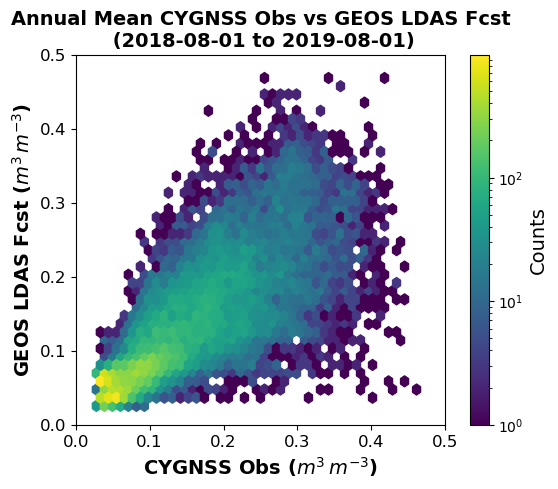

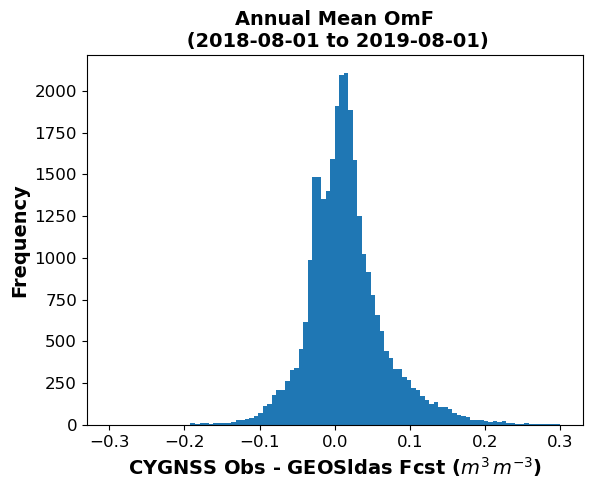

In [37]:
plt.hexbin(mean_obs_obs, mean_obs_fcst, gridsize=40, cmap='viridis', norm=LogNorm(vmin=1))
plt.xlabel('CYGNSS Obs ($m^3 \, m^{-3}$)', weight='bold', fontsize=14)
plt.ylabel('GEOS LDAS Fcst ($m^3 \, m^{-3}$)', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# set x,y lim to be 0 - 1 and square the axes
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.title(f'Annual Mean CYGNSS Obs vs GEOS LDAS Fcst\n (2018-08-01 to 2019-08-01)', weight='bold', fontsize=14)
cbar = plt.colorbar(label='Counts')
cbar.set_label('Counts', fontsize=14)

plt.savefig('long_run_OvF_scatter_presentation.png', bbox_inches='tight')

plt.show()

# Plot the distribution of obs - fcst

plt.hist(mean_obs_minus_fcst, bins=100, range=(-0.3, 0.3))
plt.xlabel('CYGNSS Obs - GEOSldas Fcst ($m^3 \, m^{-3}$)', weight='bold', fontsize=14)
plt.ylabel('Frequency', weight='bold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title(f'Annual Mean OmF\n (2018-08-01 to 2019-08-01)', weight='bold', fontsize=14)

plt.savefig('long_run_OmF_distribution_presentation.png', bbox_inches='tight')

plt.show()

In [38]:
# Load data from /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/long_run_cygd_M36/long_run_cygd_M36_20180801_20190801_OmF_ts.npz

data = np.load('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_stm/long_run_cygd_M36/long_run_cygd_M36_20180801_20190801_OmF_ts.npz')

dates_list = data['dates_list']
cygnss_obs_obs_count_list = data['cygnss_obs_obs_count_list']
cygnss_obs_obs_mean_list = data['cygnss_obs_obs_mean_list']
cygnss_obs_fcst_mean_list = data['cygnss_obs_fcst_mean_list']
cygnss_obs_ana_mean_list = data['cygnss_obs_ana_mean_list']
cygnss_omf_mean_list = data['cygnss_omf_mean_list']
cygnss_oma_mean_list = data['cygnss_oma_mean_list']
cygnss_omf_max_list = data['cygnss_omf_max_list']
cygnss_omf_std_list = data['cygnss_omf_std_list']
cygnss_oma_std_list = data['cygnss_oma_std_list']


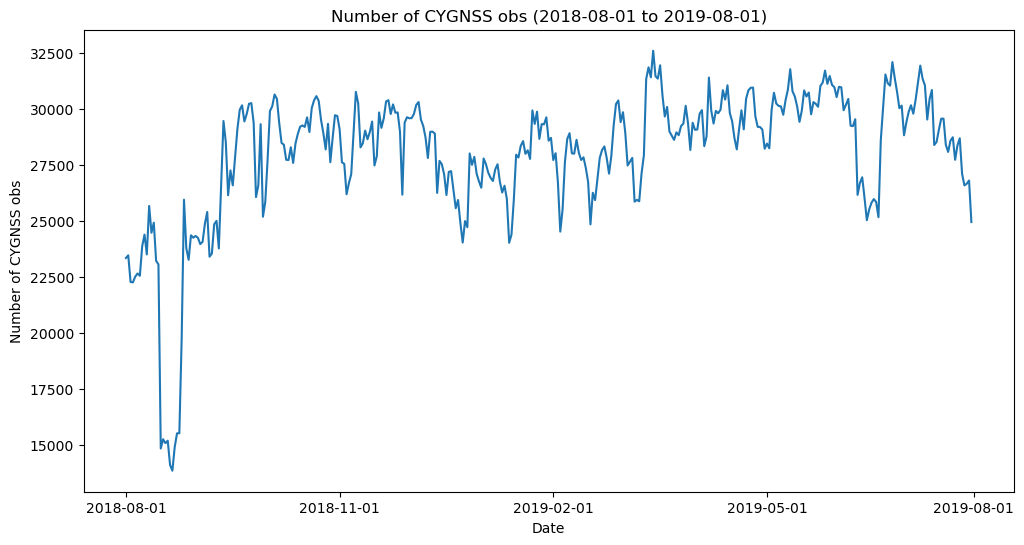

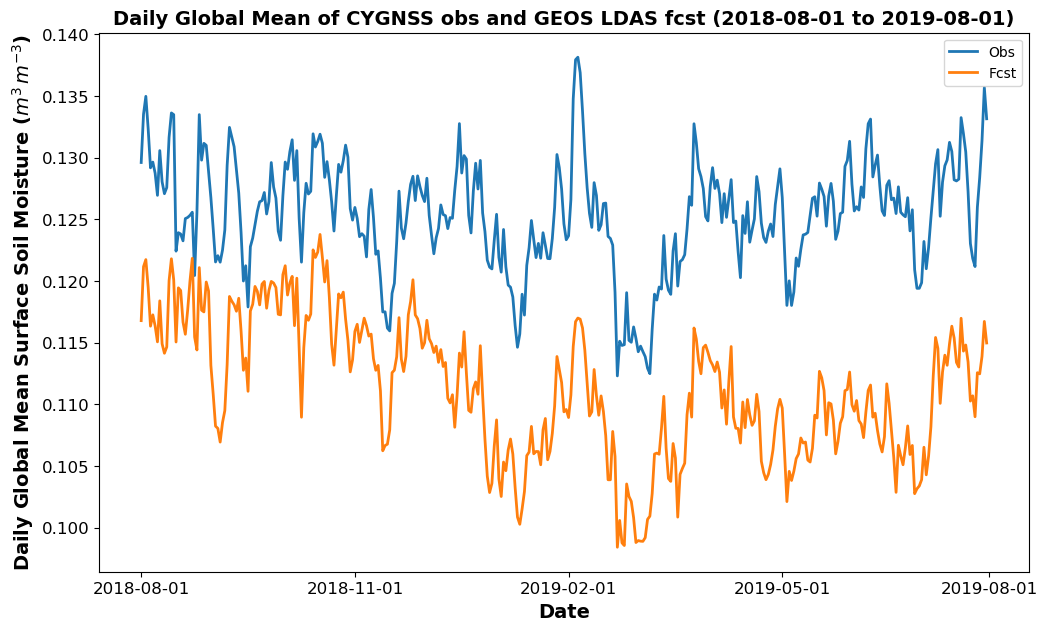

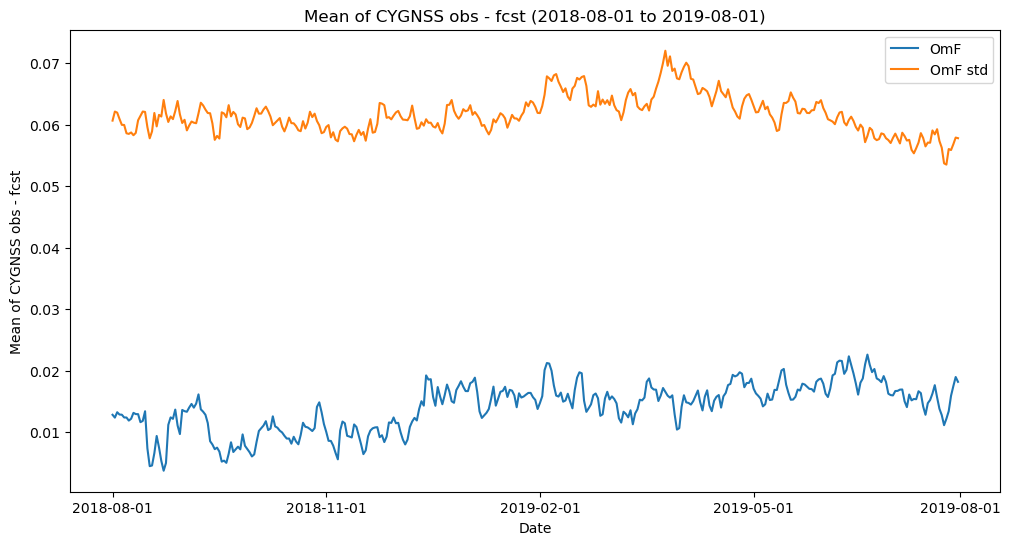

In [39]:

plt.figure(figsize=(12,6))

# Plot the number of observations, skipping the last value
plt.plot(dates_list[:-1], cygnss_obs_obs_count_list[:-1])

# Set the x-axis tick labels for 8/1/2018, 2/1/2019 and 8/1/2019 using the dates_list
plt.xticks([0, 92, 184, 276, 365], ['2018-08-01', '2018-11-01', '2019-02-01', '2019-05-01', '2019-08-01'])
plt.xlabel('Date')
plt.ylabel('Number of CYGNSS obs')
plt.title('Number of CYGNSS obs (2018-08-01 to 2019-08-01)')
plt.show()

# Plot the mean of the obs, the fcst, and the omf skipping the last value
plt.figure(figsize=(12,7))

plt.plot(dates_list[:-1], cygnss_obs_obs_mean_list[:-1], label='Obs', linewidth=2)
plt.plot(dates_list[:-1], cygnss_obs_fcst_mean_list[:-1], label='Fcst', linewidth=2)

# Apply a 30 day smoother for mean obs and mean fcst, skipping the last value
# mean_obs_smoothed = np.convolve(cygnss_obs_obs_mean_list[:-1], np.ones(30)/30, mode='valid')
# mean_fcst_smoothed = np.convolve(cygnss_obs_fcst_mean_list[:-1], np.ones(30)/30, mode='valid')

# plt.plot(dates_list[:-1][14:-15], mean_obs_smoothed, label='Obs smoothed')
# plt.plot(dates_list[:-1][14:-15], mean_fcst_smoothed, label='Fcst smoothed')

plt.legend()

# Set the x-axis tick labels for 8/1/2018, 2/1/2019 and 8/1/2019 using the dates_list
plt.xticks([0, 92, 184, 276, 365], ['2018-08-01', '2018-11-01', '2019-02-01', '2019-05-01', '2019-08-01'], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', weight='bold', fontsize=14)
plt.ylabel('Daily Global Mean Surface Soil Moisture ($m^3 \, m^{-3}$)', weight='bold', fontsize=14)
plt.title('Daily Global Mean of CYGNSS obs and GEOS LDAS fcst (2018-08-01 to 2019-08-01)', weight='bold', fontsize=14)

# Save the figure as a PNG file
plt.savefig('long_run_OmF_ts_presentation.png', bbox_inches='tight')

plt.show()


# Plot the mean omf and std of omf, skipping the last value
plt.figure(figsize=(12,6))

plt.plot(dates_list[:-1], cygnss_omf_mean_list[:-1], label='OmF')
plt.plot(dates_list[:-1], cygnss_omf_std_list[:-1], label='OmF std')

plt.legend()

# Set the x-axis tick labels for 8/1/2018, 2/1/2019 and 8/1/2019 using the dates_list
plt.xticks([0, 92, 184, 276, 365], ['2018-08-01', '2018-11-01', '2019-02-01', '2019-05-01', '2019-08-01'])
plt.xlabel('Date')
plt.ylabel('Mean of CYGNSS obs - fcst')
plt.title('Mean of CYGNSS obs - fcst (2018-08-01 to 2019-08-01)')
plt.show()
